In [45]:
%matplotlib inline

In [46]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
#Create DF
atl_airport = "airline_details_ATL.csv"

atl_airport_df = pd.read_csv(atl_airport)

atl_airport_df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2010,1,9E,Pinnacle Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1067.0,271.0,42.76,9.40,...,62.78,46.0,4.0,15932.0,4225.0,1098.0,6092.0,0.0,4517.0,NaN
1,2010,1,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",524.0,75.0,31.23,8.31,...,16.04,21.0,2.0,3825.0,1613.0,449.0,818.0,0.0,945.0,NaN
2,2010,1,AS,Alaska Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",31.0,2.0,0.00,0.00,...,0.00,0.0,0.0,93.0,0.0,0.0,93.0,0.0,0.0,NaN
3,2010,1,CO,Continental Air Lines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",148.0,30.0,7.30,1.55,...,5.24,2.0,0.0,1472.0,227.0,39.0,901.0,32.0,273.0,NaN
4,2010,1,DL,Delta Air Lines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",12706.0,1925.0,463.26,73.66,...,452.63,370.0,37.0,136387.0,46261.0,7968.0,52617.0,77.0,29464.0,NaN


In [48]:
#Which Airport Experiences The Most Delay

atl_airport_df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
count,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.00000,1296.000000,1296.000000,1296.000000,1296.000000,0.0
mean,2013.834105,6.490741,2690.392747,427.195216,104.195432,12.233002,150.365370,0.419537,159.982230,32.941358,5.529321,27592.750772,8940.61034,1195.087191,6792.192901,20.983025,10643.877315,NaN
std,2.700398,3.445313,5203.720618,777.018997,189.699636,28.101775,292.943165,0.950463,291.460253,108.053010,14.478926,53655.009544,18533.89478,3071.019312,14574.976775,61.039120,20092.992465,NaN
min,2010.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2011.000000,3.750000,147.000000,30.000000,9.835000,0.077500,10.157500,0.000000,8.180000,1.000000,0.000000,1836.000000,534.50000,5.000000,398.750000,0.000000,516.500000,NaN
50%,2014.000000,6.000000,433.500000,87.000000,27.400000,1.670000,30.765000,0.000000,23.190000,5.000000,1.000000,4786.000000,1563.00000,117.000000,1244.000000,0.000000,1635.000000,NaN
75%,2016.000000,9.000000,2003.500000,359.000000,78.162500,7.107500,111.787500,0.290000,149.370000,20.000000,4.000000,20486.000000,5831.75000,600.250000,4767.000000,11.000000,9239.000000,NaN
max,2018.000000,12.000000,21977.000000,5268.000000,1242.160000,240.790000,2401.790000,6.460000,1583.510000,1328.000000,146.000000,429194.000000,196944.00000,31960.000000,137443.000000,841.000000,147167.000000,NaN


In [49]:
atl_flights_df = atl_airport_df.loc[:, ['year', ' month', 'carrier', 'carrier_name',
       'arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct',  'arr_cancelled', 'arr_diverted']]
atl_flights_df.head()

,year,month,carrier,carrier_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted
0,2010,1,9E,Pinnacle Airlines Inc.,1067.0,271.0,42.76,9.40,156.06,0.00,62.78,46.0,4.0
1,2010,1,AA,American Airlines Inc.,524.0,75.0,31.23,8.31,19.42,0.00,16.04,21.0,2.0
2,2010,1,AS,Alaska Airlines Inc.,31.0,2.0,0.00,0.00,2.00,0.00,0.00,0.0,0.0
3,2010,1,CO,Continental Air Lines Inc.,148.0,30.0,7.30,1.55,14.46,1.45,5.24,2.0,0.0
4,2010,1,DL,Delta Air Lines Inc.,12706.0,1925.0,463.26,73.66,933.45,2.00,452.63,370.0,37.0


In [50]:
atl_airport_df.columns

Index(['year', ' month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       ' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'Unnamed: 21'],
      dtype='object')

In [51]:
#Total Sum of 15 minute delays
delays_15min = atl_flights_df["arr_del15"].sum()
print(delays_15min)

553645.0


In [52]:
#Total Sum of Carrier Delays

carrier_delays = atl_flights_df["carrier_ct"].sum()
print(carrier_delays)

135037.28


In [53]:
#Total Sum of Weather Delays

weather_delays = atl_flights_df[" weather_ct"].sum()
print(weather_delays)

15853.970000000001


In [54]:
#Total Sum of NAS Delays

nas_delays = atl_flights_df["nas_ct"].sum()
print(nas_delays)

194873.52


In [55]:
#Total Sum of Security Delays
security_delays = atl_flights_df["security_ct"].sum()
print(security_delays)

543.72


In [56]:
#Late Aircraft Delays
late_aircraft_delays = atl_flights_df["late_aircraft_ct"].sum()
print(late_aircraft_delays)

207336.96999999997


In [106]:
# Atlanta Answer for Question 1

labels = ["15 Minute Delays", "Carrier Delays", "Weather Delays", "NAS Delays", "Security Delays",
          "Late Aircraft Delay" ]

#Values of Each Section
amounts = [delays_15min, carrier_delays, weather_delays, nas_delays, security_delays, late_aircraft_delays]

colors = ["red", "blue", "purple", "yellow", "gold", "maroon"]

explode = (0, 0, 0, 0.2, 0, 0 )

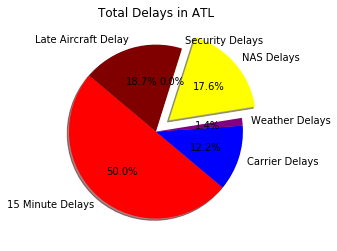

In [110]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(amounts, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Total Delays in ATL")
plt.savefig("Total Delays in ATL.png")

In [16]:
#Over the Last Decade, What Has Been The Most Significant Change


In [59]:
yearly_atl = atl_flights_df.groupby('year')
yearly_atl.head()

,year,month,carrier,carrier_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted
0,2010,1,9E,Pinnacle Airlines Inc.,1067.0,271.0,42.76,9.40,156.06,0.00,62.78,46.0,4.0
1,2010,1,AA,American Airlines Inc.,524.0,75.0,31.23,8.31,19.42,0.00,16.04,21.0,2.0
2,2010,1,AS,Alaska Airlines Inc.,31.0,2.0,0.00,0.00,2.00,0.00,0.00,0.0,0.0
3,2010,1,CO,Continental Air Lines Inc.,148.0,30.0,7.30,1.55,14.46,1.45,5.24,2.0,0.0
4,2010,1,DL,Delta Air Lines Inc.,12706.0,1925.0,463.26,73.66,933.45,2.00,452.63,370.0,37.0
179,2011,1,AA,American Airlines Inc.,448.0,63.0,37.58,0.92,9.65,0.00,14.84,30.0,0.0
180,2011,1,AS,Alaska Airlines Inc.,31.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0
181,2011,1,CO,Continental Air Lines Inc.,120.0,21.0,10.58,0.09,7.41,0.00,2.92,17.0,0.0
182,2011,1,DL,Delta Air Lines Inc.,15152.0,2483.0,573.82,71.18,1192.31,1.79,643.90,1328.0,5.0
183,2011,1,EV,Atlantic Southeast Airlines,9400.0,1746.0,341.80,50.66,427.75,0.00,925.79,878.0,5.0


In [60]:
atl_flights_yearly_df = atl_airport_df.loc[:, ['year',
       'arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct',  'arr_cancelled', 'arr_diverted']]
atl_flights_yearly_df

,year,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted
0,2010,1067.0,271.0,42.76,9.40,156.06,0.00,62.78,46.0,4.0
1,2010,524.0,75.0,31.23,8.31,19.42,0.00,16.04,21.0,2.0
2,2010,31.0,2.0,0.00,0.00,2.00,0.00,0.00,0.0,0.0
3,2010,148.0,30.0,7.30,1.55,14.46,1.45,5.24,2.0,0.0
4,2010,12706.0,1925.0,463.26,73.66,933.45,2.00,452.63,370.0,37.0
5,2010,12006.0,2273.0,364.52,113.69,927.37,5.14,862.29,512.0,13.0
6,2010,89.0,11.0,1.72,0.00,5.43,0.00,3.85,0.0,1.0
7,2010,5731.0,934.0,141.96,13.47,402.28,0.00,376.30,137.0,15.0
8,2010,57.0,16.0,7.09,3.17,3.54,0.00,2.21,2.0,0.0
9,2010,337.0,125.0,47.49,4.55,66.22,0.77,5.98,32.0,1.0


In [19]:
#15 Min Delay Mean

delays_15min_mean = atl_flights_df["arr_del15"].mean()
print(delays_15min_mean)

427.19521604938274


In [20]:
#Carrier Delays Mean

carrier_delays_mean = atl_flights_df["carrier_ct"].mean()
print(carrier_delays_mean)

104.19543209876545


In [21]:
#Weather Delays Mean

weather_delays_mean = atl_flights_df[" weather_ct"].mean()
print(weather_delays_mean)

12.233001543209896


In [22]:
#Nas Delay Mean

nas_delays_mean = atl_flights_df["nas_ct"].mean()
print(nas_delays_mean)

150.36537037037


In [23]:
#Security Delays Mean
security_delays_mean = atl_flights_df["security_ct"].mean()
print(security_delays_mean)

0.4195370370370372


In [24]:
#Late Aircraft Delays Mean
late_aircraft_delays_mean = atl_flights_df["late_aircraft_ct"].mean()
print(late_aircraft_delays_mean)

159.98222993827176


In [37]:
[delays_15min_mean, carrier_delays_mean, weather_delays_mean, nas_delays_mean, 
               security_delays_mean, late_aircraft_delays_mean]

[427.19521604938274,
 104.19543209876545,
 12.233001543209896,
 150.36537037037,
 0.4195370370370372,
 159.98222993827176]

In [105]:
atl_yearly = atl_airport_df.groupby('year')
atl_yearly = pd.DataFrame(atl_yearly[['arr_flights', 'arr_del15', 'arr_cancelled', 'arr_diverted', ' weather_ct', 'carrier_ct', 'nas_ct', 
                                      'security_ct', 'late_aircraft_ct']].sum())

atl_yearly['total_flights'] = atl_yearly['arr_flights']+ atl_yearly['arr_del15']+ atl_yearly['arr_cancelled']+ atl_yearly['arr_diverted']

atl_yearly

,arr_flights,arr_del15,arr_cancelled,arr_diverted,weather_ct,carrier_ct,nas_ct,security_ct,late_aircraft_ct,total_flights
year,,,,,,,,,,
2010,414596.0,77891.0,9279.0,945.0,2329.66,16303.07,32885.30,73.27,26299.72,502711.0
2011,393051.0,69197.0,7484.0,812.0,1516.25,14822.94,25926.55,51.16,26880.08,470544.0
2012,391953.0,56370.0,2782.0,655.0,1242.97,13447.57,20620.89,50.12,21008.52,451760.0
2013,398882.0,72292.0,3450.0,655.0,2124.43,15779.03,27456.47,65.16,26866.94,475279.0
2014,369842.0,62396.0,6483.0,655.0,1657.71,15564.53,20717.72,40.91,24415.26,439376.0
2015,379498.0,55176.0,2752.0,1124.0,1701.30,15762.03,17394.94,64.33,20253.49,438550.0
2016,384252.0,49607.0,2350.0,736.0,1388.47,14631.21,13829.93,47.97,19709.52,436945.0
2017,364596.0,50392.0,5501.0,832.0,1484.20,13936.09,14830.83,76.46,20064.52,421321.0
2018,390079.0,60324.0,2611.0,752.0,2408.98,14790.81,21210.89,74.34,21838.92,453766.0


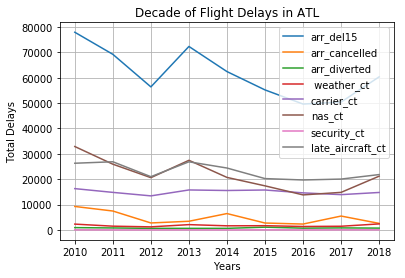

In [111]:
type(atl_yearly.index.values)

for x in atl_yearly.index.values:
    x_axis = x


atl_yearly['arr_del15'].plot()
atl_yearly['arr_cancelled'].plot()
atl_yearly['arr_diverted'].plot()
atl_yearly[' weather_ct'].plot()
atl_yearly['carrier_ct'].plot()
atl_yearly['nas_ct'].plot()
atl_yearly['security_ct'].plot()
atl_yearly['late_aircraft_ct'].plot()

plt.grid(True)
plt.legend(loc='best')
plt.title('Decade of Flight Delays in ATL')
plt.xlabel('Years')
plt.ylabel('Total Delays')
plt.savefig("Decade of Flight Delays in ATL.png")

In [ ]:
#What Month of the Year Experiences the Most Delays

In [104]:
atl_monthly = atl_airport_df.groupby(' month')
atl_monthly = pd.DataFrame(atl_monthly[['arr_flights', 'arr_del15', 'arr_cancelled', 'arr_diverted', ' weather_ct', 'carrier_ct', 'nas_ct', 
                                      'security_ct', 'late_aircraft_ct']].sum())

atl_monthly['total_flights'] = atl_monthly['arr_flights']+ atl_monthly['arr_del15']+ atl_monthly['arr_cancelled']+ atl_monthly['arr_diverted']

atl_monthly

,arr_flights,arr_del15,arr_cancelled,arr_diverted,weather_ct,carrier_ct,nas_ct,security_ct,late_aircraft_ct,total_flights
month,,,,,,,,,,
1,280332.0,45933.0,9371.0,434.0,1636.11,11097.50,16556.01,33.49,16610.03,336070.0
2,259299.0,38920.0,7346.0,308.0,1420.10,9307.18,13757.37,35.07,14400.39,305873.0
3,301880.0,48244.0,3185.0,491.0,1083.64,11477.04,17211.75,47.74,18423.84,353800.0
4,291562.0,41927.0,3095.0,539.0,1024.12,10422.01,14290.87,39.58,16150.44,337123.0
5,300818.0,47835.0,1685.0,557.0,1275.76,11646.46,16800.69,48.58,18063.51,350895.0
6,300786.0,62027.0,2875.0,1464.0,2113.02,14436.18,21399.39,57.07,24021.32,367152.0
7,307977.0,63745.0,2817.0,1406.0,2342.23,14797.10,22889.27,56.03,23660.47,375945.0
8,307289.0,52433.0,3290.0,745.0,1563.03,12886.92,18375.43,48.84,19558.87,363757.0
9,282809.0,35453.0,2087.0,442.0,896.48,8918.02,13124.51,28.56,12485.49,320791.0


In [ ]:
# Which Airline Carrier Has Experienced the Largest Delays

In [38]:
carrier_atl = atl_flights_df.groupby('carrier_name')
carrier_atl.head()

,year,month,carrier,carrier_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted
0,2010,1,9E,Pinnacle Airlines Inc.,1067.0,271.0,42.76,9.40,156.06,0.00,62.78,46.0,4.0
1,2010,1,AA,American Airlines Inc.,524.0,75.0,31.23,8.31,19.42,0.00,16.04,21.0,2.0
2,2010,1,AS,Alaska Airlines Inc.,31.0,2.0,0.00,0.00,2.00,0.00,0.00,0.0,0.0
3,2010,1,CO,Continental Air Lines Inc.,148.0,30.0,7.30,1.55,14.46,1.45,5.24,2.0,0.0
4,2010,1,DL,Delta Air Lines Inc.,12706.0,1925.0,463.26,73.66,933.45,2.00,452.63,370.0,37.0
5,2010,1,EV,Atlantic Southeast Airlines,12006.0,2273.0,364.52,113.69,927.37,5.14,862.29,512.0,13.0
6,2010,1,F9,Frontier Airlines Inc.,89.0,11.0,1.72,0.00,5.43,0.00,3.85,0.0,1.0
7,2010,1,FL,AirTran Airways Corporation,5731.0,934.0,141.96,13.47,402.28,0.00,376.30,137.0,15.0
8,2010,1,MQ,American Eagle Airlines Inc.,57.0,16.0,7.09,3.17,3.54,0.00,2.21,2.0,0.0
9,2010,1,OH,Comair Inc.,337.0,125.0,47.49,4.55,66.22,0.77,5.98,32.0,1.0
